In [5]:
import sklearn

In [1]:



import xmltodict, json
import imgaug as ia
from imgaug import augmenters as iaa
import math

ImportError: No module named 'xmltodict'

In [41]:
#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs

In [42]:
lobster_images = os.listdir('tangier_lobster/')
import imgaug as ia
from imgaug import augmenters as iaa
import math

In [56]:
def process_image_keypoints(img,bbox_coords):
    [(xmin, ymin), (xmax, ymax)] = bbox_coords
    
    img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im

In [44]:
# for key in gender_dict:
#     print(gender_dict[key])

In [45]:
genders = pd.read_csv('gender.csv')

In [46]:
gender_dict = {} 
for idx,row in genders.iterrows():
    gender_dict[int(row['id'])] = row['gender']

In [73]:
count_correct = 0
labels =  []
images = []
count_wrong = 0
for file in os.listdir("tangier_lobster//"):
    try:
        if file.endswith(".jpg") or file.endswith(".JPG"):
                lobster_number = file.split("_")[0]
                path = 'tangier_lobster_images_for_landmarks/'+file
                print(path)
                bgr_img = cv2.imread(path)
                print(path)
                
                with open('tangier_lobster_for_landmarks_bboxes/'+file.split(".")[0]+'.xml','r') as f:
                   text = f.read()
                   d = xmltodict.parse(text)
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                #print(obj)
                bbox = obj['bndbox']                
                bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]
                #bbox_coords = [[cx - (w/2.0),cy - (h/2.0)],[cx + (w/2.0),cy + (h/2.0)]]
                
                img = process_image_keypoints(bgr_img,bbox_coords)
                
                
                #img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(gender_dict[int(lobster_number)])
    except Exception as ex:
        print(ex)
        count_wrong += 1

tangier_lobster_images_for_landmarks/85_1.jpg
tangier_lobster_images_for_landmarks/85_1.jpg
tangier_lobster_images_for_landmarks/99_1.jpg
tangier_lobster_images_for_landmarks/99_1.jpg
tangier_lobster_images_for_landmarks/7_1.JPG
tangier_lobster_images_for_landmarks/7_1.JPG
tangier_lobster_images_for_landmarks/85_2.jpg
tangier_lobster_images_for_landmarks/85_2.jpg
tangier_lobster_images_for_landmarks/67_2.jpg
tangier_lobster_images_for_landmarks/67_2.jpg
tangier_lobster_images_for_landmarks/66_1.jpg
tangier_lobster_images_for_landmarks/66_1.jpg
tangier_lobster_images_for_landmarks/107_1.jpg
tangier_lobster_images_for_landmarks/107_1.jpg
tangier_lobster_images_for_landmarks/45_1.JPG
tangier_lobster_images_for_landmarks/45_1.JPG
tangier_lobster_images_for_landmarks/32_1.JPG
tangier_lobster_images_for_landmarks/32_1.JPG
tangier_lobster_images_for_landmarks/33_1.JPG
tangier_lobster_images_for_landmarks/33_1.JPG
tangier_lobster_images_for_landmarks/50_1.JPG
tangier_lobster_images_for_landmar

tangier_lobster_images_for_landmarks/64_1.jpg
tangier_lobster_images_for_landmarks/83_1.jpg
tangier_lobster_images_for_landmarks/83_1.jpg
tangier_lobster_images_for_landmarks/81_2.jpg
tangier_lobster_images_for_landmarks/81_2.jpg
tangier_lobster_images_for_landmarks/91_2.jpg
tangier_lobster_images_for_landmarks/91_2.jpg
tangier_lobster_images_for_landmarks/74_1.jpg
tangier_lobster_images_for_landmarks/74_1.jpg
tangier_lobster_images_for_landmarks/27_1.JPG
tangier_lobster_images_for_landmarks/27_1.JPG
tangier_lobster_images_for_landmarks/66_3.jpg
tangier_lobster_images_for_landmarks/66_3.jpg
tangier_lobster_images_for_landmarks/107_2.jpg
tangier_lobster_images_for_landmarks/107_2.jpg
tangier_lobster_images_for_landmarks/17_1.JPG
tangier_lobster_images_for_landmarks/17_1.JPG
tangier_lobster_images_for_landmarks/44_1.JPG
tangier_lobster_images_for_landmarks/44_1.JPG
tangier_lobster_images_for_landmarks/30_1.JPG
tangier_lobster_images_for_landmarks/30_1.JPG
tangier_lobster_images_for_landm

tangier_lobster_images_for_landmarks/86_1.jpg
tangier_lobster_images_for_landmarks/76_1.jpg
tangier_lobster_images_for_landmarks/76_1.jpg
tangier_lobster_images_for_landmarks/71_1.jpg
tangier_lobster_images_for_landmarks/71_1.jpg
tangier_lobster_images_for_landmarks/73_1.jpg
tangier_lobster_images_for_landmarks/73_1.jpg
tangier_lobster_images_for_landmarks/57_1.jpg
tangier_lobster_images_for_landmarks/57_1.jpg
tangier_lobster_images_for_landmarks/11_1.JPG
tangier_lobster_images_for_landmarks/11_1.JPG


In [57]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

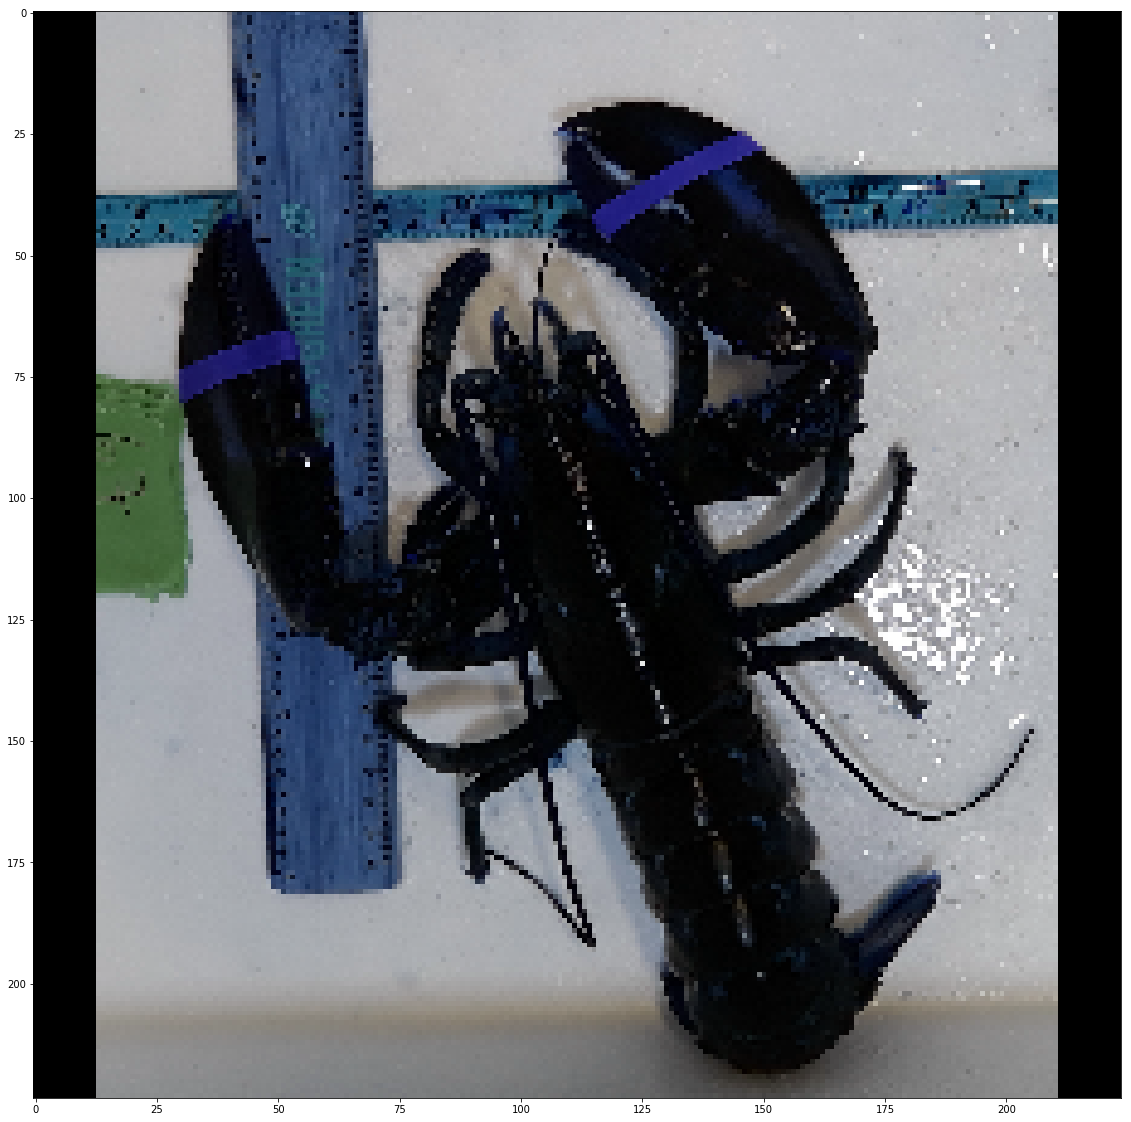

In [80]:
plt.figure(figsize=(20,20))
plt.imshow(images[4])

In [9]:
# landmarks = list(np.array(landmarks)[indexes])
# bboxes = list(np.array(bboxes)[indexes])
# labels =  list(np.array(labels)[indexes])
# images = list(np.array(images)[indexes])
# image_sizes = list(np.array(image_sizes)[indexes])

In [10]:
# import seaborn as sns
# import numpy as np
# from scipy.stats import itemfreq
# itemfreq(labels)

In [11]:
# num_labels = len(np.unique(list(labels)))
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(list(labels))
# le_labels = le.transform(labels)
# one = preprocessing.OneHotEncoder()
# one.fit(list(le_labels.reshape(-1,1)))
# one_labels = one.transform(le_labels.reshape(-1,1))
# numpy.save('classes.npy', le.classes_)

In [81]:
def augment_images(images,labels,times):
    all_images = list(images)
    all_labels = list(labels)
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    return all_images,all_labels

In [82]:
# list(np.array(labels)[train])

In [83]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images,labels):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images)[train],np.array(labels)[train],2)
    kfold_data.append([train_images,train_labels,np.array(images)[test],np.array(labels)[test]])

1
2
3
4
5


In [84]:
with open('data-gender0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-gender1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-gender2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-gender3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-gender4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [85]:
# idx = 408
# tuples = []
# for i in range(11):
#     tuples.append((all_landmarks[idx][i*2],all_landmarks[idx][i*2+1]))
# for i in range(11):
#     img = cv2.circle(all_images[idx],(int(tuples[i][0]),int(tuples[i][1])), 1, (0,0,255), -1)
    
# pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
# pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
# img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
# pil_im = Image.fromarray(img)
# plt.figure(figsize=(15,15))
# plt.imshow(pil_im)

In [87]:
# fig, ax = plt.subplots(figsize=(12,15))



# plt.subplot(1, 3, 1)
# idx = 381
# point_list = []
# #for keypoint in all_bboxes[idx].keypoints:
# #    point_list.append([keypoint.x,keypoint.y])

# point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
# [all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

# pts = np.array(point_list)
# pts = pts.reshape((-1,1,2))
# img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
# pil_im = Image.fromarray(img)
# plt.imshow(pil_im)
# plt.xticks([])
# plt.yticks([])

# plt.subplot(1, 3, 2)
# idx = 786
# point_list = []
# #for keypoint in all_bboxes[idx].keypoints:
# #    point_list.append([keypoint.x,keypoint.y])

# point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
# [all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

# pts = np.array(point_list)
# pts = pts.reshape((-1,1,2))
# img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
# pil_im = Image.fromarray(img)
# plt.imshow(pil_im)
# plt.xticks([])
# plt.yticks([])

# plt.subplot(1, 3, 3)
# idx = 1014
# point_list = []
# #for keypoint in all_bboxes[idx].keypoints:
# #    point_list.append([keypoint.x,keypoint.y])

# point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
# [all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

# pts = np.array(point_list)
# pts = pts.reshape((-1,1,2))
# img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
# pil_im = Image.fromarray(img)
# plt.imshow(pil_im)
# plt.xticks([])
# plt.yticks([])

# plt.savefig('rotated_bounding_boxes.jpg')
# plt.show()

In [ ]:
# plt.plot(kfold_data[0][0])

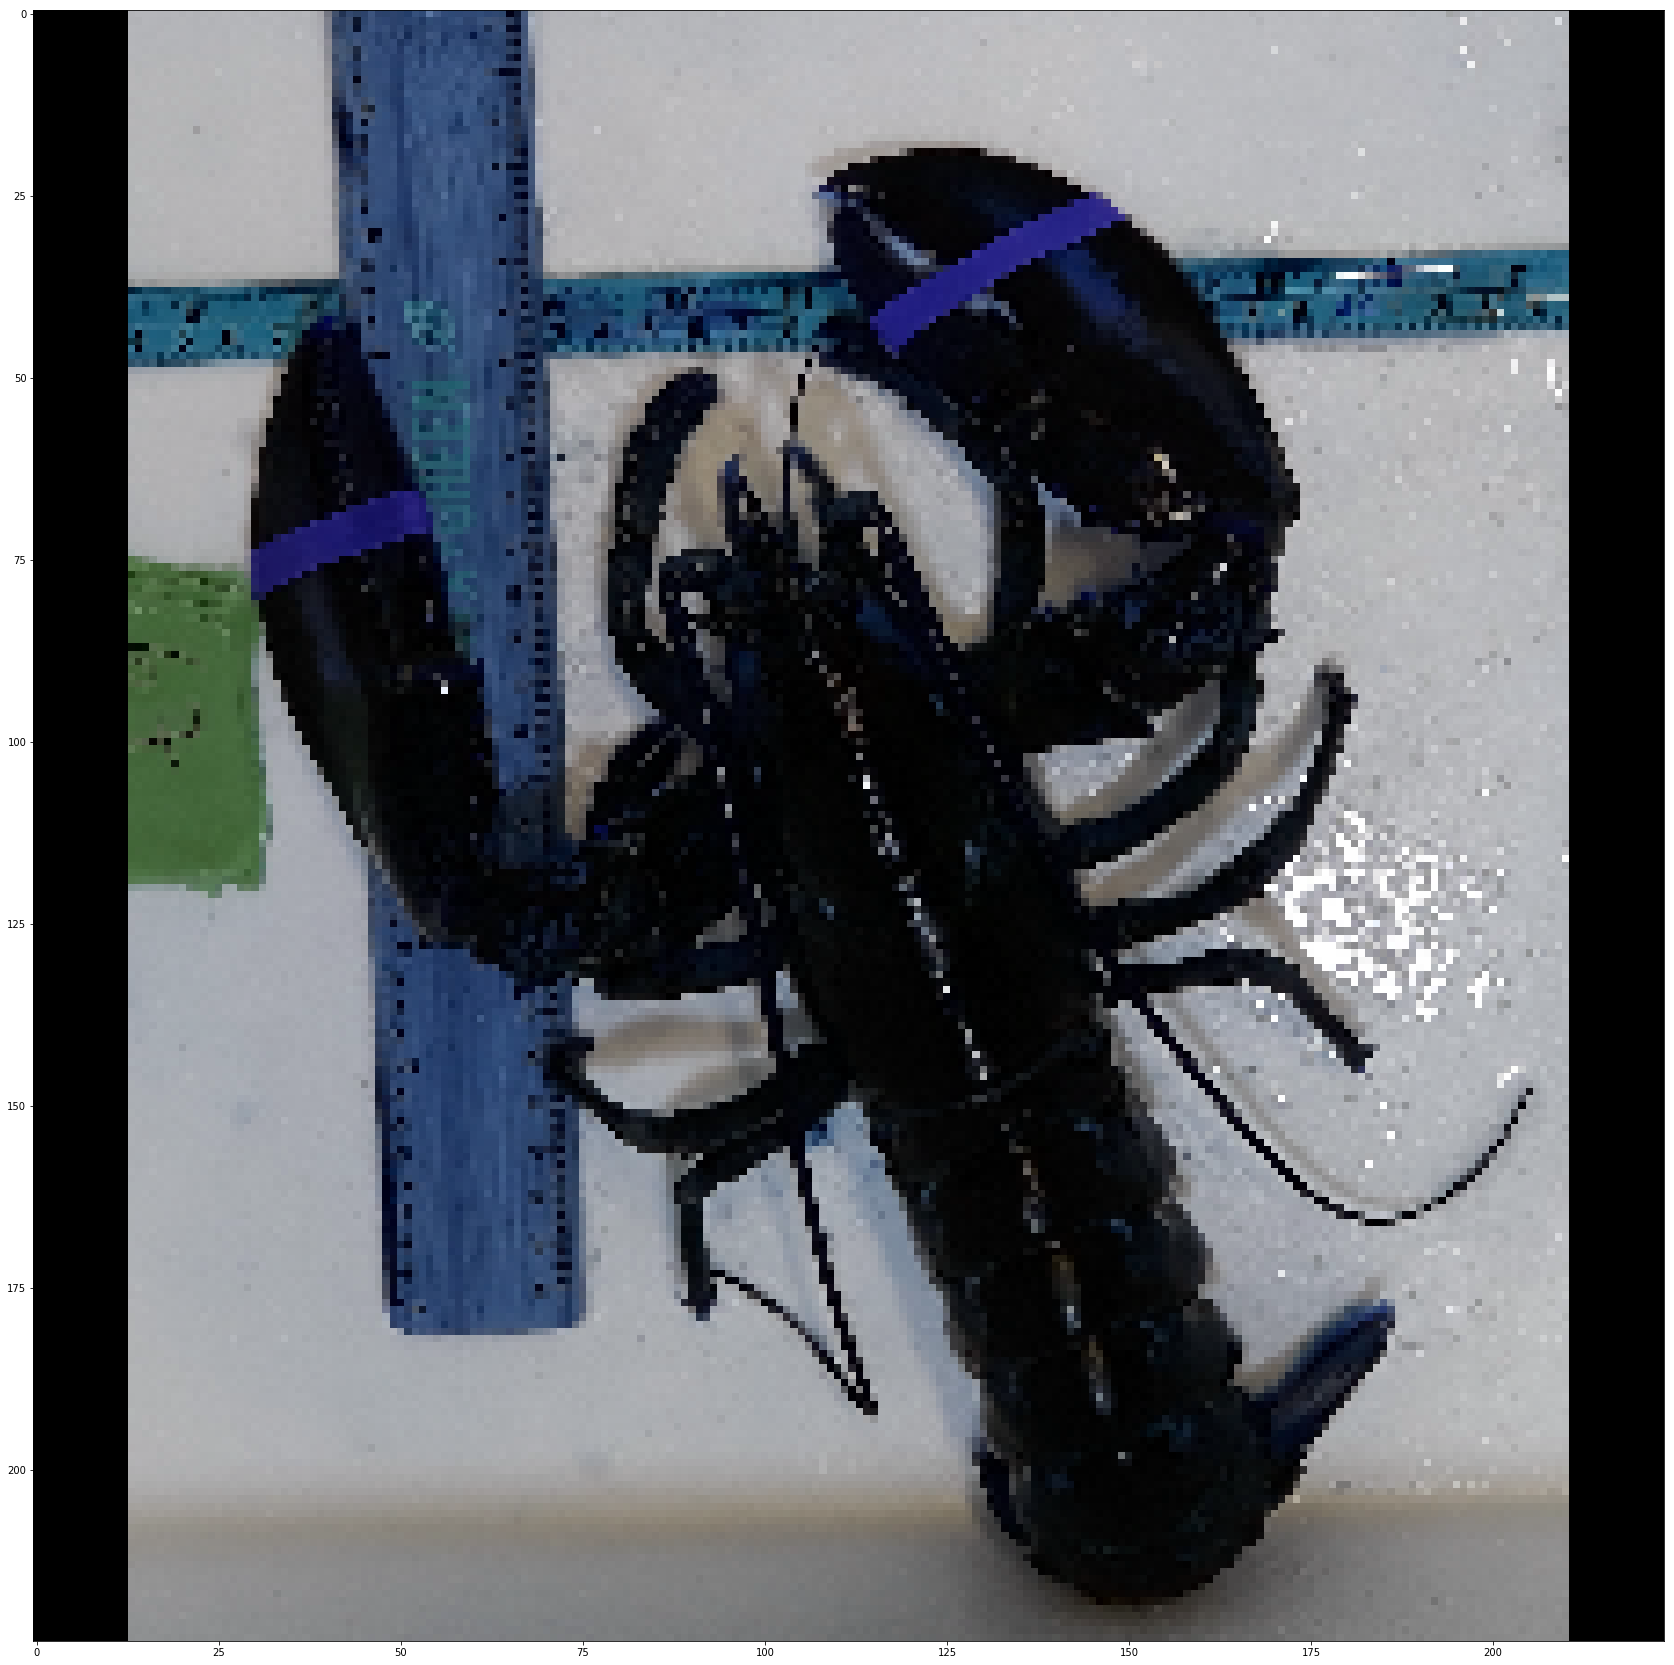

In [88]:
plt.figure(figsize=(30,30))
plt.imshow(train_images[4])

In [89]:
train_labels[4]

'F'